In [65]:
import math
import cmath
import numpy as np
import matplotlib.pyplot as plt
pnm_prima = [[None, None, None, None, None, None],
             [3.832, 1.841, 3.054, 4.201, 5.317, 6.416],
             [7.016, 5.331, 6.706, 8.015, 9.282, 10.520],
             [10.174, 8.536, 9.970, 11.346, 12.682, 13.987],
             [13.324, 11.706, 13.170, 14.586, 15.964, 17.313] ]
pnm      = [[None, None, None, None, None, None],
             [2.405, 3.832, 5.136, 6.380, 7.588, 8.772],
             [5.520, 7.016, 8.417, 9.761, 11.065, 12.339],
             [8.654, 10.174, 11.620, 13.015, 14.373, 15.700],
             [11.792, 13.324, 14.796, 16.224, 17.616, 18.980] ]
pnm_prima = np.transpose(pnm_prima)
pnm = np.transpose(pnm)
sigma =  37.7*1e6 #S/m
c = 3 * 1e8 #m/s
er = 1
eta = 120 * math.pi / math.sqrt(er)
v = 3 * 1e8 / math.sqrt(er)
mu = 4 * math.pi * 1e-7 #Hy/m
a = 23.44*1e-3

In [66]:
fc_TE = lambda n, m, a: v*pnm_prima[n,m] / (2*math.pi*a)
fc_TM = lambda n, m, a: v*pnm[n,m] / (2*math.pi*a)
frec = []
for n in range(0, 4):
    for m in range(1, 4):
        if not (n == 0 and m == 0):
            frec.append((n, m, "TE", round(fc_TE(n, m, a) * 1e-9, 2)))
for n in range(0, 4):
    for m in range(1, 4):
        frec.append((n, m, "TM", round(fc_TM(n, m, a) * 1e-9, 2)))
frec = sorted(frec, key=lambda x: x[3], reverse=False)
for i in range(14):
    print(" Modo {}{}{} con una fc = {}GHz".format(frec[i][2], frec[i][0], frec[i][1], frec[i][3]))

 Modo TE11 con una fc = 3.75GHz
 Modo TM01 con una fc = 4.9GHz
 Modo TE21 con una fc = 6.22GHz
 Modo TE01 con una fc = 7.81GHz
 Modo TM11 con una fc = 7.81GHz
 Modo TE31 con una fc = 8.56GHz
 Modo TM21 con una fc = 10.46GHz
 Modo TE12 con una fc = 10.86GHz
 Modo TM02 con una fc = 11.24GHz
 Modo TM31 con una fc = 13.0GHz
 Modo TE22 con una fc = 13.66GHz
 Modo TE02 con una fc = 14.29GHz
 Modo TM12 con una fc = 14.29GHz
 Modo TE32 con una fc = 16.33GHz


In [67]:
k = lambda f_: math.sqrt(er)*2*math.pi*f_*1e9/v
beta = lambda fc_,f_, k_: k_*cmath.sqrt(1 - (fc_/f_)**2)
Rs = lambda f_: math.sqrt((2*math.pi*f_*1e9*mu)/(2*sigma))
alfa_c_TE = lambda Rs, k, beta, n, m: (Rs/(a*eta*k*beta)) * ((k**2) - (beta**2) + (((n*k)**2)/((pnm_prima[n][m]**2) - (n**2))))
alfa_c_TM = lambda Rs, k, beta, n, m: (Rs*k/(a*eta*beta))

Cálculo de $\alpha_c$ para $TE_{11}$

In [68]:
f_x = np.linspace(2,15,10000)
alfa_c_TE11 = []
for f_ in f_x:
    k_x = k(f_)
    beta_x = beta(fc_TM(1,1,a)*1e-9,f_,k_x)
    if beta_x.imag < 0.000001:
        Rs_x = Rs(f_)
        alfa_c_x = alfa_c_TE(Rs_x, k_x, beta_x, 1, 1)
        alfa_c_TE11.append(alfa_c_TE(Rs_x, k_x, beta_x, 1, 1).real/8.685889638)
    else:
        alfa_c_TE11.append(10000000000)
print(alfa_c_TE11)

[10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000

Cálculo de $\alpha_c$ para $TM_{01}$

In [69]:
f_x = np.linspace(2,15,10000)
alfa_c_TM01 = []
for f_ in f_x:
    k_x = k(f_)
    beta_x = beta(fc_TM(0,1,a)*1e-9,f_,k_x)
    if beta_x.imag < 0.000001:
        Rs_x = Rs(f_)
        alfa_c_x = alfa_c_TM(Rs_x, k_x, beta_x, 0, 1)
        alfa_c_TM01.append(alfa_c_TM(Rs_x, k_x, beta_x, 0, 1).real/8.685889638)
    else:
        alfa_c_TM01.append(10000000000)
print(alfa_c_TM01)

[10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000

Cálculo de $\alpha_c$ para $TE_{01}$

In [70]:
f_x = np.linspace(2,15,10000)
alfa_c_TE01 = []
for f_ in f_x:
    k_x = k(f_)
    beta_x = beta(fc_TE(0,1,a)*1e-9,f_,k_x)
    if beta_x.imag < 0.000001:
        Rs_x = Rs(f_)
        alfa_c_x = alfa_c_TE(Rs_x, k_x, beta_x, 0, 1)
        alfa_c_TE01.append(alfa_c_TE(Rs_x, k_x, beta_x, 0, 1).real/8.685889638)
    else:
        alfa_c_TE01.append(10000000000)
print(alfa_c_TE01)

[10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000

Cálculo de $\alpha_c$ para $TM_{11}$

In [71]:
f_x = np.linspace(2,15,10000)
alfa_c_TM11 = []
for f_ in f_x:
    k_x = k(f_)
    beta_x = beta(fc_TM(1,1,a)*1e-9,f_,k_x)
    if beta_x.imag < 0.000001:
        Rs_x = Rs(f_)
        alfa_c_x = alfa_c_TM(Rs_x, k_x, beta_x, 1, 1)
        alfa_c_TM11.append(alfa_c_TM(Rs_x, k_x, beta_x, 1, 1).real/8.685889638)
    else:
        alfa_c_TM11.append(10000000000)
print(alfa_c_TM11)

[10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000, 10000000000

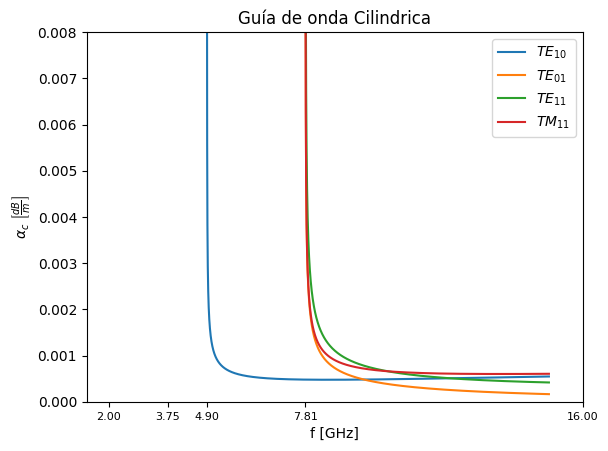

In [72]:
plt.plot(f_x, alfa_c_TM01, label = r"$TE_{10}$")
plt.plot(f_x, alfa_c_TE01, label = r"$TE_{01}$")
plt.plot(f_x, alfa_c_TE11, label = r"$TE_{11}$")
plt.plot(f_x, alfa_c_TM11, label = r"$TM_{11}$")
plt.ylim([0,0.008])
plt.xticks([2, 3.75, 4.9, 7.81, 16], fontsize=8)
plt.title("Guía de onda Cilindrica")
plt.xlabel("f [GHz]")
plt.ylabel(r"$\alpha_c$ $\left [ \frac{dB}{m}\right ]$")
plt.legend()
plt.savefig("Ej4-Guía cilindrica", dpi=200)
plt.show()